In [63]:
from google.colab import drive
from google.colab import files
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc # Import necessary functions
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import numpy as np  # Import numpy with the alias 'np'

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd

crashdata = pd.read_csv('/content/drive/My Drive/crashdata2022-present.csv')
vehicledata = pd.read_csv('/content/drive/My Drive/vehiclecrashdata2022-present.csv')

merged_df = pd.merge(crashdata, vehicledata, left_on='Name', right_on='CrashName', how='inner')


display(merged_df)
merged_df.to_csv('merged_data.csv', index=False)
files.download('merged_data.csv')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('combined_crash_data.csv', index=False)

,CrashFactId,Name_x,MinorInjuries_x,ModerateInjuries_x,SevereInjuries_x,FatalInjuries_x,TcrNumber,CityDamageFlag,ShortFormFlag,Distance,...,SafetyEquipment,SafetyEquipmentCategory,FatalInjuries_y,SevereInjuries_y,ModerateInjuries_y,MinorInjuries_y,PartySubType,Race,VehicleMakeModelType,TrailerAttached
0,711791,CR-0000100908,2,0,0,0,23-306-0529,False,False,36.0,...,B - Unknown,Occupants,0.0,0.0,0.0,1.0,Unknown,H - Hispanic / Latin / Mexican,Honda / Odyssey / Minivan,False
1,711791,CR-0000100908,2,0,0,0,23-306-0529,False,False,36.0,...,B - Unknown,Occupants,0.0,0.0,0.0,1.0,Unknown,H - Hispanic / Latin / Mexican,Mazda / MZ3 / Car,False
2,711791,CR-0000100908,2,0,0,0,23-306-0529,False,False,36.0,...,P - Not Required,Occupants,0.0,0.0,0.0,0.0,Unknown,NaN,Nissan / Frontier / Pickup Truck,False
3,692417,CR-0000097700,1,0,0,0,23-081-0828,False,False,105.0,...,V - Driver No,M / C Bicycle - Helmet,0.0,0.0,0.0,0.0,Unknown,NaN,Honda / Civic / Car,False
4,692417,CR-0000097700,1,0,0,0,23-081-0828,False,False,105.0,...,G - Lap/Shoulder Harness Used,Occupants,0.0,0.0,0.0,1.0,Unknown,Hispanic / Latin / Mexican,Dodge / Charger / Car,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24569,692407,CR-0000097690,1,0,0,0,23-080-0386,False,False,42.0,...,B - Unknown,Occupants,0.0,0.0,0.0,0.0,Unknown,Hispanic / Latin / Mexican,Chevrolet / Tahoe / SUV,False
24570,689710,CR-0000095713,0,0,0,0,22-359-0462,False,False,0.0,...,B - Unknown,Occupants,0.0,0.0,0.0,0.0,Unknown,NaN,Nissan / Sentra / Car,False
24571,689710,CR-0000095713,0,0,0,0,22-359-0462,False,False,0.0,...,G - Lap/Shoulder Harness Used,Occupants,0.0,0.0,0.0,0.0,Unknown,Other Asian,Honda / Accord / Car,False
24572,691032,CR-0000097204,0,0,0,0,23-083-0650,False,False,88.0,...,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,NaN,Toyota / Sienna / Minivan,False


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
count_above_100 = len(merged_df[merged_df['Age'] > 100])

print(f"Number of ages above 100: {count_above_100}")

Number of ages above 100: 7


In [66]:
age_counts = merged_df['Age'].value_counts()

merged_df = merged_df[(merged_df['Age'] != 0) & (merged_df['Age'] <= 100)]
print(merged_df.Age)




0        43
1        25
4        23
8        23
10       27
         ..
24565    32
24567    22
24568    35
24569    41
24571    38
Name: Age, Length: 16282, dtype: int64


In [67]:
num_rows = len(merged_df)  # If you haven't filtered, use the original DataFrame name

# Or, if you have filtered and stored it in 'filtered_df':
# num_rows = len(filtered_df)

print(f"Number of rows in the table: {num_rows}")

Number of rows in the table: 16282


In [68]:
column_names = merged_df.columns.tolist()


# Print the names of the column types
print(column_names)

columns_to_keep = ['MinorInjuries_x', 'ModerateInjuries_x', 'SevereInjuries_x', 'FatalInjuries_x',
                   'CityDamageFlag', 'Distance', 'CrashDateTime', 'RoadwayCondition', 'Lighting',
                   'Weather', 'CollisionType', 'SpeedingFlag', 'HitAndRunFlag', 'Sex', 'Age',
                   'Speed', 'Sobriety']
merged_df = merged_df[columns_to_keep]
display(merged_df)


['CrashFactId', 'Name_x', 'MinorInjuries_x', 'ModerateInjuries_x', 'SevereInjuries_x', 'FatalInjuries_x', 'TcrNumber', 'CityDamageFlag', 'ShortFormFlag', 'Distance', 'CrashDateTime', 'PedestrianAction', 'RoadwaySurface', 'RoadwayCondition', 'Lighting', 'PrimaryCollisionFactor', 'TrafficControl', 'Weather', 'CollisionType', 'ProximityToIntersection', 'VehicleInvolvedWith', 'PedestrianDirectionFrom', 'PedestrianDirectionTo', 'DirectionFromIntersection', 'Comment', 'SpeedingFlag', 'HitAndRunFlag', 'IntersectionNumber', 'AStreetName', 'BStreetName', 'Latitude', 'Longitude', 'CrashName', 'Name_y', 'Sex', 'Age', 'Speed', 'VehicleDamage', 'PartyCategory', 'Sobriety', 'VehicleDirection', 'MovementPrecedingCollision', 'PartyType', 'OtherAssociatedFactor', 'VehicleCount', 'ViolationCode', 'ViolationCodeDescription', 'PossibleTransientFlag', 'InattentionCodes', 'SafetyEquipment', 'SafetyEquipmentCategory', 'FatalInjuries_y', 'SevereInjuries_y', 'ModerateInjuries_y', 'MinorInjuries_y', 'PartySubTy

,MinorInjuries_x,ModerateInjuries_x,SevereInjuries_x,FatalInjuries_x,CityDamageFlag,Distance,CrashDateTime,RoadwayCondition,Lighting,Weather,CollisionType,SpeedingFlag,HitAndRunFlag,Sex,Age,Speed,Sobriety
0,2,0,0,0,False,36.0,11/2/2023 2:48:00 PM,No Unusual Conditions,Daylight,Clear,Rear End,True,False,M,43,NaN,Had Been Drinking - Impairment Unknown
1,2,0,0,0,False,36.0,11/2/2023 2:48:00 PM,No Unusual Conditions,Daylight,Clear,Rear End,True,False,M,25,NaN,Had Been Drinking - Impairment Unknown
4,1,0,0,0,False,105.0,3/22/2023 10:31:00 PM,No Unusual Conditions,Dark - Street Light,Clear,Rear End,True,False,M,23,NaN,Impairment Not Known
8,0,0,0,0,False,100.0,6/11/2022 10:21:00 PM,No Unusual Conditions,Daylight,Clear,Rear End,False,True,M,23,NaN,Impairment Not Known
10,0,0,0,0,False,51.0,2/14/2022 8:00:00 AM,Unknown,Daylight,Unknown,Other,False,False,M,27,NaN,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24565,0,0,1,0,False,20.0,7/23/2023 9:51:00 PM,No Unusual Conditions,Dark - Street Light,Clear,Hit Object,True,False,M,32,NaN,Had Not Been Drinking
24567,0,0,0,0,False,0.0,4/10/2023 9:15:00 PM,No Unusual Conditions,Dark - Street Light,Clear,Other,False,True,M,22,NaN,Had Not Been Drinking
24568,1,0,0,0,False,42.0,3/21/2023 12:27:00 PM,No Unusual Conditions,Daylight,Rain,Sideswipe,False,False,M,35,NaN,Had Not Been Drinking
24569,1,0,0,0,False,42.0,3/21/2023 12:27:00 PM,No Unusual Conditions,Daylight,Rain,Sideswipe,False,False,M,41,NaN,Had Not Been Drinking


In [69]:
import re

def map_hour_to_group(hour):
  if hour >= 0 and hour < 4:
    return 0
  elif hour >= 4 and hour < 8:
    return 1
  elif hour >= 8 and hour < 12:
    return 2
  elif hour >= 12 and hour < 16:
    return 3
  elif hour >= 16 and hour < 20:
    return 4
  elif hour >= 20 and hour < 24:
    return 5

def extract_hour(time_string):
  match = re.search(r"(\d+):\d+:\d+ (AM|PM)", str(time_string))  # Convert to string
  if match:
    hour = int(match.group(1))
    am_pm = match.group(2)
    if am_pm == "PM" and hour != 12:
      hour += 12
    elif am_pm == "AM" and hour == 12:
      hour = 0
    return hour
  else:
    return None  # Or handle invalid format as needed


# Assuming your DataFrame is called 'merged_df' and the column is 'CrashDateTime'
merged_df['CrashHour'] = merged_df['CrashDateTime'].apply(extract_hour)
print(merged_df.CrashHour)

0        14
1        14
4        22
8        22
10        8
         ..
24565    21
24567    21
24568    12
24569    12
24571    15
Name: CrashHour, Length: 16282, dtype: int64


In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode = ['Sex', 'MinorInjuries_x', 'ModerateInjuries_x',
                     'SevereInjuries_x', 'FatalInjuries_x', 'Lighting',
                     'Weather', 'CollisionType', 'Sobriety', 'RoadwayCondition', 'CityDamageFlag','SpeedingFlag', 'HitAndRunFlag'
]

for column in columns_to_encode:
    merged_df[column + '_converted'] = le.fit_transform(merged_df[column])
merged_df1 = merged_df.copy() # Creating a deep copy of merged_df to merged_df1

display(merged_df)

,CrashFactId,CrashName,MinorInjuries_x,ModerateInjuries_x,SevereInjuries_x,FatalInjuries_x,TcrNumber,CityDamageFlag,ShortFormFlag,Distance,...,SevereInjuries_x_converted,FatalInjuries_x_converted,Lighting_converted,Weather_converted,CollisionType_converted,Sobriety_converted,RoadwayCondition_converted,CityDamageFlag_converted,SpeedingFlag_converted,HitAndRunFlag_converted
0,711791,CR-0000100908,2,0,0,0,23-306-0529,False,False,36.0,...,0,0,3,0,5,0,4,0,1,0
1,711791,CR-0000100908,2,0,0,0,23-306-0529,False,False,36.0,...,0,0,3,0,5,0,4,0,1,0
2,711791,CR-0000100908,2,0,0,0,23-306-0529,False,False,36.0,...,0,0,3,0,5,6,4,0,1,0
3,692417,CR-0000097700,1,0,0,0,23-081-0828,False,False,105.0,...,0,0,1,0,5,6,4,0,1,0
4,692417,CR-0000097700,1,0,0,0,23-081-0828,False,False,105.0,...,0,0,1,0,5,4,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24569,692407,CR-0000097690,1,0,0,0,23-080-0386,False,False,42.0,...,0,0,3,4,6,3,4,0,0,0
24570,689710,CR-0000095713,0,0,0,0,22-359-0462,False,False,0.0,...,0,0,3,0,6,4,4,0,0,0
24571,689710,CR-0000095713,0,0,0,0,22-359-0462,False,False,0.0,...,0,0,3,0,6,4,4,0,0,0
24572,691032,CR-0000097204,0,0,0,0,23-083-0650,False,False,88.0,...,0,0,3,0,6,6,4,0,1,0


Accuracy: 0.8308259134172551


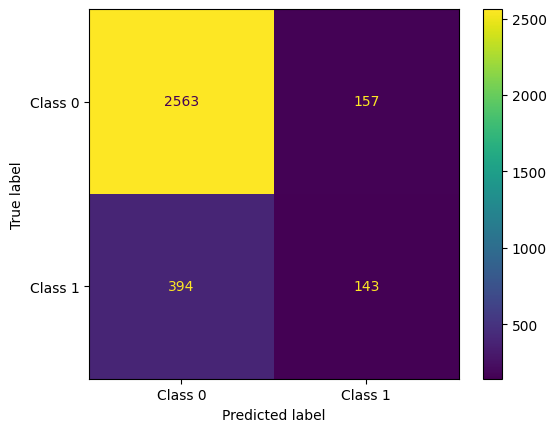

In [71]:



# Select features and target variable
features = ['Age', 'MinorInjuries_x_converted', 'ModerateInjuries_x_converted', 'SevereInjuries_x_converted', 'FatalInjuries_x_converted', 'CrashHour', 'RoadwayCondition_converted', 'Lighting_converted',
                   'Weather_converted', 'CollisionType_converted', 'Sex_converted', 'Sobriety_converted','CityDamageFlag_converted','SpeedingFlag_converted'
]  # Assuming these are your desired features
target = 'HitAndRunFlag'  # Assuming 'HitAndRunFlag_crash' is the target

# Assuming 'merged_df' is your DataFrame
X = merged_df[features]
y = merged_df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing




# Create and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1']) # Adjust labels
disp.plot()
plt.show()




In [72]:
train_percentage = len(X_train) / len(merged_df) * 100
test_percentage = len(X_test) / len(merged_df) * 100

print(f"Training percentage: {train_percentage:.2f}%")
print(f"Testing percentage: {test_percentage:.2f}%")

Training percentage: 80.00%
Testing percentage: 20.00%


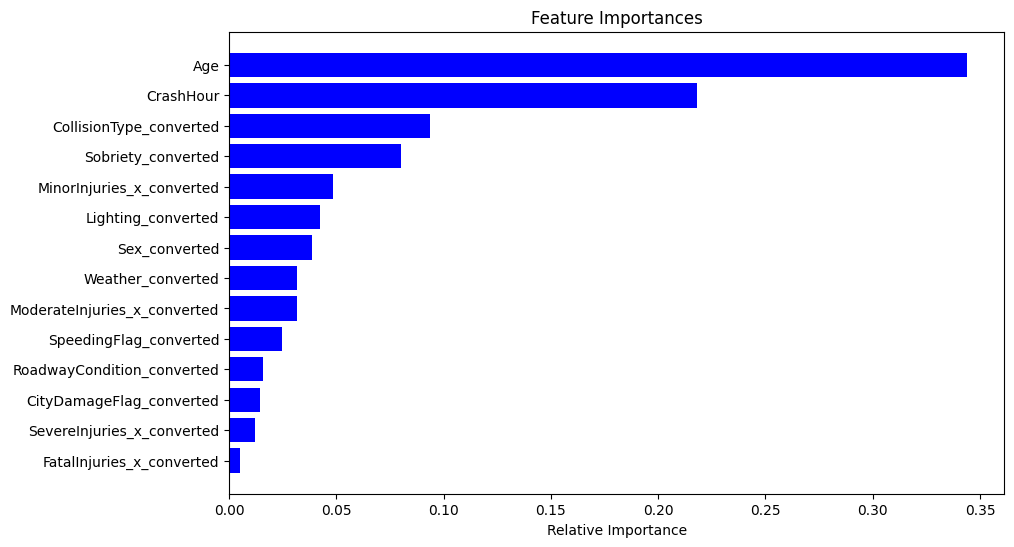

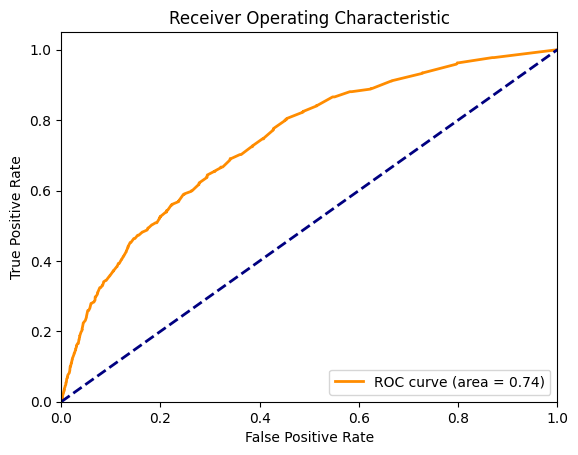

In [73]:
# Feature Importance

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# ROC Curve (if binary classification)
y_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Assuming binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Previous Times Work - Chi Squared Test etc. Vehicles Dataset

In [74]:
crashdata.rename(columns={'Name': 'CrashName'}, inplace=True)
# print("Columns in first CSV:")
# print(crashdata.columns)

# print("\nColumns in second CSV:")
# print(vehicledata.columns)

merged_df = pd.merge(crashdata, vehicledata, how='inner', on='CrashName')
# print("\nMerged DataFrame:")
# print(merged_df)



In [75]:
merged_df1=merged_df
filtered_df = merged_df[merged_df['Age'] != 0][['CrashName', 'HitAndRunFlag', 'Age']]
print("\nMerged DataFrame:")
print(filtered_df)

correlation_coefficient, p_value = pointbiserialr(filtered_df['Age'], filtered_df['HitAndRunFlag'])

# Display the results
print("\nCorrelation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Merged DataFrame:
           CrashName  HitAndRunFlag  Age
0      CR-0000100908          False   43
1      CR-0000100908          False   25
4      CR-0000097700          False   23
8      CR-0000092543           True   23
10     CR-0000092724          False   27
...              ...            ...  ...
24565  CR-0000098626          False   32
24567  CR-0000099340           True   22
24568  CR-0000097690          False   35
24569  CR-0000097690          False   41
24571  CR-0000095713          False   38

[16289 rows x 3 columns]

Correlation Coefficient: -0.032173939801157965
P-value: 4.007350383217779e-05


In [85]:
filtered_df = merged_df1[merged_df1['Sobriety_converted'] != 0][['CrashName', 'HitAndRunFlag', 'Sobriety_converted']]
print("\nMerged DataFrame:")
print(filtered_df)

correlation_coefficient, p_value = pointbiserialr(filtered_df['Sobriety_converted'], filtered_df['HitAndRunFlag'])

# Display the results
print("\nCorrelation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Merged DataFrame:
           CrashName  HitAndRunFlag  Sobriety_converted
2      CR-0000100908          False                   6
3      CR-0000097700          False                   6
4      CR-0000097700          False                   4
5      CR-0000097700          False                   6
6      CR-0000097700          False                   6
...              ...            ...                 ...
24569  CR-0000097690          False                   3
24570  CR-0000095713          False                   4
24571  CR-0000095713          False                   4
24572  CR-0000097204          False                   6
24573  CR-0000097204          False                   4

[24461 rows x 3 columns]

Correlation Coefficient: 0.19523499569734007
P-value: 1.0277691041444895e-208


# New Section